In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pathh="/workspaces/Hausdorff_morphological/csvResD.csv"
df= pd.read_csv(pathh)

Matplotlib is building the font cache; this may take a moment.


In [2]:
df.columns

Index(['hdToTestRobustTime', 'hdToTestTime', 'avSurfDistToTestTime',
       'myRobustHdTime', 'myHdTime', 'mymedianHdTime', 'olivieraTime',
       'hdToTestRobustValue', 'hdToTestValue', 'myRobustHdValue', 'myHdValue',
       'mymeanHdValue', 'olivieraValue', 'avSurfDistToTestValue',
       'hdToTestValue.1', 'sitk_average_value', 'sitk_hd_value',
       'bench_sitk_time', 'WIDTH', 'HEIGHT', 'DEPTH', 'noise', 'distortion',
       'translations', 'Unnamed: 24'],
      dtype='object')

In [3]:
hdToTestRobustTime= df['hdToTestRobustTime'].to_numpy()
myRobustHdTime= df['myRobustHdTime'].to_numpy()

olivieraTime= df['olivieraTime'].to_numpy()
myHdTime= df['myHdTime'].to_numpy()

bench_sitk_time= df['bench_sitk_time'].to_numpy()
mymedianHdTime= df['mymedianHdTime'].to_numpy()


In [7]:
bench_sitk_time

array([         nan,   6.        ,  11.        ,  60.48966854,
        60.94259594,  67.37210105, 334.6714807 , 531.0084745 ,
       334.6714807 ,   1.        ,   6.        ,  11.        ,
        16.        ,  21.        ,  26.        , 355.6248023 ,
       531.0084745 , 355.6248023 ,   1.        ,   6.        ,
        11.        ,  62.72160712,  63.1585307 , 147.766708  ,
         1.        ,   6.        ,  11.        ,  16.        ,
        21.        ,  26.        , 322.925688  , 319.7639755 ,
       338.1848607 , 322.925688  ,   1.        ,   6.        ,
        11.        ,  21.        ,  21.        ,  32.03123476,
       400.6207683 , 292.5576866 , 319.7639755 , 400.6207683 ,
         1.        ,   6.        ,  11.        ,  16.        ,
        21.        ,  26.        , 410.1755722 , 338.1848607 ,
       292.5576866 , 410.1755722 ,   1.        ,   6.        ,
        11.        ,  16.        ,  21.        ,  26.        ,
         1.        ,   8.06225775,  13.45362405,  19.23

In [10]:

my = [np.nanmean(myRobustHdTime), np.nanmean(myHdTime), np.nanmean(mymedianHdTime)]
my_error = [np.nanstd(myRobustHdTime), np.nanstd(myHdTime), np.nanstd(mymedianHdTime)]

their = [np.nanmean(hdToTestRobustTime), np.nanmean(olivieraTime), np.nanmean(bench_sitk_time)]
their_error = [np.nanstd(hdToTestRobustTime), np.nanstd(olivieraTime), np.nanstd(bench_sitk_time)]

# my=np.log10(my)
# my_error=np.log10(my_error)
# their=np.log10(their)
# their_error=np.log10(their_error)

print(f" my {my} \n  my_error {my_error} \n their {their} \n their_error {their_error} ")


 my [0.04026173578603054, 0.04432870284007634, 0.0888880671521374] 
  my_error [0.04014276244838773, 0.03448377040636122, 0.12134845800248108] 
 their [56.408254366633585, 0.2972857051908397, 156.7512800542231] 
 their_error [43.108169471714014, 0.37824698660650286, 200.57831208031592] 


In [11]:
np.array(their)/np.array(my)

array([1401.03880932,    6.70639306, 1763.46820306])

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


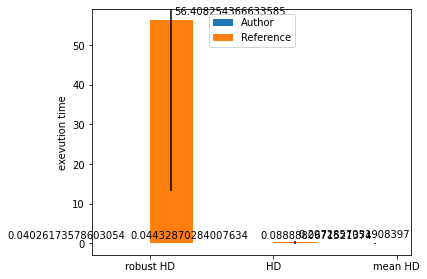

In [6]:


men_means, men_std = my, my_error
women_means, women_std = their, their_error

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                label='Author')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                label='Reference')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('exevution time')
ax.set_title('')
ax.set_xticks(ind)
ax.set_xticklabels(('robust HD', 'HD', 'mean HD'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    adapted from https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()